# Maxwell's equations on a periodic 1D grid of $[0,L]$

## Staggered grid
Consider the periodic 1D interval $[0, L]$. The primal grid consists of the nodes of a uniform grid of $N$ cells $x_j = j L~/N$ for $0\le j < N$, and the dual grid consists of the midpoints of the cells $x_{j+1/2} = \left(j+\frac{1}{2}\right) L~/N$ for $0\le j < N$.

In [1]:
# Place interactive figures inside the notebook
#%matplotlib widget
%matplotlib inline

# Import modules
import numpy as np
import matplotlib.pyplot as plt

# Create vector images using TikZ?
#
# To use TikZ, make sure that ImageMagick and pdf2svg packages are installed
# on your machine, then install "ipython-tikzmagic" jupyter extension with
#
# pip3 install --user git+git://github.com/mkrphys/ipython-tikzmagic.git
use_tikz = True

# Load TikZ extension, or create dummy magic to skip cell content
if use_tikz:
    %load_ext tikzmagic
else:
    from IPython.core.magic import register_cell_magic
    @register_cell_magic
    def tikz(line, cell=None):
        return

In [ ]:
%%tikz -s 600,200 -f svg
\scriptsize
\filldraw[fill=white] (-1,-1) rectangle (6,1);
\draw[step=1.0,black,thin] (0,0) grid (5.,0.);
\foreach \x in {0,...,4}
    \draw (\x cm,-3pt) -- (\x cm,3pt);
\foreach \x in {0.5,...,4.5}      
    \draw (\x,0) node{$\times$};
\foreach \x in {0,...,1}
    \draw (\x,-10pt) node{$x_\x$};
\draw (5.01,3pt) arc (160:200:10pt);
\draw (4,-10pt) node{$x_{N-1}$};  
\draw (0,10pt) node{$0$};  
\draw (5,10pt) node{$1$};        
\draw (0.5,-10pt) node{$x_{\frac{1}{2}}$};
\draw (1.5,-10pt) node{$x_{\frac{3}{2}}$};
\draw (4.7,-10pt) node{$x_{N-\frac{1}{2}}$};

Consider the homogeneous 1D Maxwell equations on our periodic domain

\begin{equation}
\left\{
\begin{split}
\frac{\partial E}{\partial t} + \frac{\partial B}{\partial x} &= 0, \\
\frac{\partial B}{\partial t} + \frac{\partial E}{\partial x} &= 0,
\end{split}
\right.
\end{equation}

with initial conditions $E(t=0,x) = E_0(x)$ and $B(t=0,x) = B_0(x)$

## Yee's scheme

Given a time-step size $\Delta t$, a staggered grid is also created in time:

1. The primal grid has values $t_n = n\Delta t$ for $n\in\mathbb{N}$;
2. The dual grid has values $t_{n+1/2} = \left(n +\frac{1}{2}\right)\Delta t$ for $n\in\mathbb{N}$.

Moreover:

- The field $E$ is described by its point values on the ___primal___ space-time grid $(t_n, x_j)$;
- The field $B$ is described by its point values on the ___dual___ space-time grid $(t_{n+1/2}, x_{j+1/2})$;
- The time and spatial derivatives of $E$ and $B$ are approximated by 2nd-ordered centered finite difference formulas.

We obtain therefore the following update formulas, to be applied consecutively:

\begin{align}
%
\color{orange}{B^{n+1/2}_{j+1/2}} &= B^{n-1/2}_{j+1/2} +
    \frac{\Delta t}{\Delta x}\left(E^{n}_{j} - E^{n}_{j+1}\right),
    \qquad {0\le j < N},\\
%
\color{cyan}{E^{n+1}_{j}} &= E^n_{j} + \frac{\Delta t}{\Delta x}
    \left(\color{orange}{B^{n+1/2}_{j-1/2}} - \color{orange}{B^{n+1/2}_{j+1/2}} \right),
    \qquad {0\le j < N}.
%
\end{align}


### Startup and shutdown

Notice that at time $n=0$ one needs to compute the values $\left\{B^{-1/2}_{j+1/2}\right\}_j$ from the initial condition $\left\{B^{0}_{j+1/2}\right\}_j$ in order to start the scheme:

\begin{equation}
  B^{-1/2}_{j+1/2} = B^0_{j+1/2} - \frac{\Delta t}{2\Delta x}
  \left(E^{0}_{j} - E^{0}_{j+1}\right),
  \qquad {0\le j < N}.
\end{equation}

Similarly, at the last time step $M$ one needs to compute the final solution $\left\{B^{M}_{j+1/2}\right\}_j$ from the previous values $\left\{B^{M-1/2}_{j+1/2}\right\}_j$:

\begin{equation}
  B^{M}_{j+1/2} = B^{M-1/2}_{j+1/2} + \frac{\Delta t}{2\Delta x}
  \left(E^{M}_{j} - E^{M}_{j+1}\right),
  \qquad {0\le j < N}.
\end{equation}

In general, the operation of pushing the discrete $B$ field forward (and then backward) in time is required whenever the solution needs to be visualized.


### Energy diagnostic

The electromagnetic energy in the continuous system at time $t$ is

\begin{equation}
  W(t) = \frac{1}{2} \int_0^L \left[ E^2(t) + B^2(t) \right] dx,
\end{equation}

which is constant in time thanks to the periodic boundary conditions.
In order to compute a discrete version of the above, we can use the rectangle quadrature rule separately on the primal and dual grids, and then add up the results to obtain

\begin{equation}
  W^n = \frac{\Delta x}{2} \sum_{j=0}^{N-1} \left[
  \left(E^n_j\right)^2 + \left(B^n_{j+1/2}\right)^2 \right],
\end{equation}

where the values $\left(B^n_{j+1/2}\right)_j$ at the integer times $t_n$ are obtained through a procedure similar to the above.

In [ ]:
%run ex1_yee.py -h

In [ ]:
%run ex1_yee.py 20 -t 20

### Convergence Analysis

In [ ]:
# Coarsest grid: number of cells and time-steps
N0 = 20
s0 = 20

refinement = [(2**i) for i in range(4)]

N_list   = []
err_list = []

for r in refinement:
    N = N0 * r
    s = s0 * r
    
    %run ex1_yee.py $N -p 0 -t $s
    
    N_list.append(yee_namespace['N'])
    err_list.append(yee_namespace['error_E'])

In [ ]:
print_error_analysis(N_list, err_list)

### Stability

If we define the (circulant) differentiation matrix $D \in \mathbb{R}^{N \times N}$ as

\begin{equation}
  D = \frac{\Delta t}{\Delta x}~
  \begin{pmatrix}
     1 &  0 & \dots  & \dots  & -1 \\
    -1 &  1 &        &        &  0 \\
     0 & -1 &  1     &        &    \\
       &    & \ddots & \ddots &    \\
     0 &    & \ddots &   -1   &  1 \\
  \end{pmatrix}
\end{equation}

it is possible to write the one-step update formula of the Yee scheme as

\begin{equation}
  \begin{pmatrix}
  I & 0 \\
  D & I \\
  \end{pmatrix}
  \begin{pmatrix}
    B^{n+1/2} \\
    E^{n+1}   \\
  \end{pmatrix} =
  \begin{pmatrix}
  I & D^{T} \\
  0 & I   \\
  \end{pmatrix}
  \begin{pmatrix}
    B^{n-1/2} \\
    E^{n}     \\
  \end{pmatrix}.
\end{equation}

We notice that the matrix on the left-hand side is easily invertible,

\begin{equation}
  \begin{pmatrix}
  I & 0 \\
  D & I \\
  \end{pmatrix}^{-1} =
  \begin{pmatrix}
   I & 0 \\
  -D & I \\
  \end{pmatrix},
\end{equation}

and therefore

\begin{equation}
  \begin{pmatrix}
    B^{n+1/2} \\
    E^{n+1}   \\
  \end{pmatrix} =
  \begin{pmatrix}
   I &      D^T \\
  -D & I -D D^T   \\
  \end{pmatrix}
  \begin{pmatrix}
    B^{n-1/2} \\
    E^{n}     \\
  \end{pmatrix}.
\end{equation}

Given the initial conditions, the solution after $M$ time steps is obtained by applying the formula above recursively for $M$ times. This yields

\begin{equation}
  \begin{pmatrix}
    B^{M-1/2} \\
    E^{M}   \\
  \end{pmatrix} =
  \begin{pmatrix}
   I &      D^T \\
  -D & I -D D^T   \\
  \end{pmatrix}^{M}
  \begin{pmatrix}
    B^{-1/2} \\
    E^{0}     \\
  \end{pmatrix}.
\end{equation}

If we simplify the notation as

\begin{equation}
  U^{n+1} = A~U^n
\end{equation}

and we write the eigendecomposition $A = Q\Lambda Q^{-1}$ then we have

\begin{equation}
  U^{M} = A^M U^0 = (Q~\Lambda Q^{-1})^M ~ U^0 = Q~\Lambda^M Q^{-1} ~ U^0.
\end{equation}

So clearly the solution $U^M$ will not "explode" as $M\to\infty$ if and only if all the eigenvalues of $A$ satisfy

\begin{equation}
  | \lambda_i | \le 1.
\end{equation}

One can easily see that the __stability__ of the scheme depends the ratio $C_p = \Delta t/\Delta x$, which is called the Courant parameter.

In [2]:
def yee_eigenvalues(N, Cp):

    from scipy import linalg as la

    I = np.identity(N)
    c = np.zeros(N); c[0] = Cp; c[1] = -Cp
    D = la.circulant(c)
    A = np.block([[ I, D.T               ],
                  [-D, I - np.dot(D, D.T)]])
    
    return np.linalg.eigvals(A)

In [3]:
abs( yee_eigenvalues(10, 0.7) )

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [4]:
abs( yee_eigenvalues(10, 1.1) )

array([2.42816665, 0.41183335, 1.83195669, 1.83195669, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.54586443, 0.54586443])

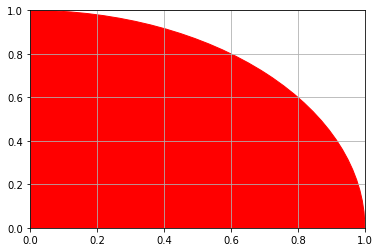

interactive(children=(IntSlider(value=10, description='N', min=10, step=10), FloatSlider(value=0.5, descriptio…

<function __main__.plot_yee_eigenvalues(N, Cp)>

In [8]:
fig = plt.figure(10)
ax  = fig.subplots(1, 1)
ax.grid(True)
unit_circle = plt.Circle((0, 0), 1.0, color='r')
ax.add_artist(unit_circle)

def plot_yee_eigenvalues(N, Cp):
    eigs = yee_eigenvalues(N, Cp)
    if len(ax.lines) > 0:
        ax.lines.pop()
    ax.plot(eigs.real, eigs.imag, '*b')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_aspect('equal')
    ax.set_xlabel(r'$Re(\lambda)$')
    ax.set_ylabel(r'$Im(\lambda)$')
    fig.canvas.draw()

import ipywidgets as widgets
from ipywidgets import interact

ncells_widget  = widgets.IntSlider(min=10, max=100, step=10, value=10)
courant_widget = widgets.FloatSlider(min=0.1, max=1.2, step=0.1, value=0.5)
interact(plot_yee_eigenvalues, N=ncells_widget, Cp=courant_widget)